# Chemistry — Visualising Chemical Structures

Various tools exist for visualising various chemical structures using static images as well as interactive 3d representations.

## 2D visualisations

A wide range of packages are available for depicting two dimensional representations of chemical structures defined in conventional ways.

For example ?SMILES

### `rdkit`

The [`rdkit`](https://rdkit.org/docs/index.html) package, an open source toolkit for cheminformatics, provides a wide range of tools for working with chemical representations.

In [1]:
#%pip install rdkit-pypi
#import rdkit

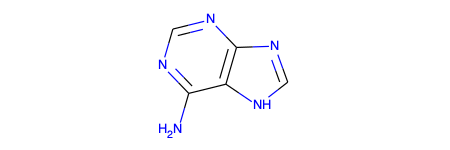

In [2]:
from rdkit import Chem

m = Chem.MolFromSmiles("C1=NC2=C(N1)C(=NC=N2)N")
m

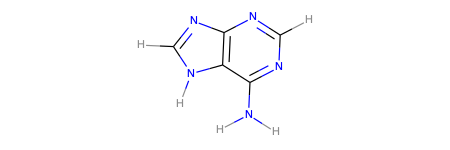

In [3]:
m = Chem.AddHs(m)
m

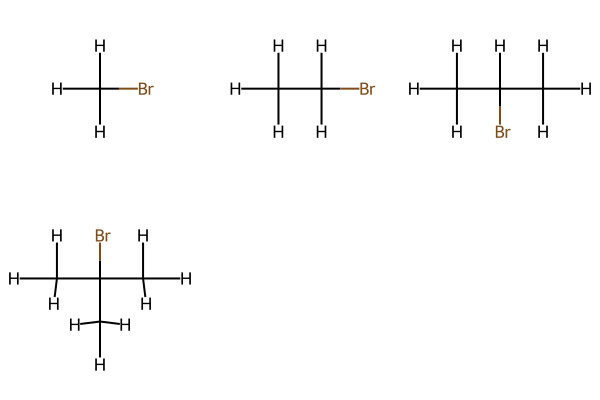

In [4]:
from rdkit.Chem import Draw

def smilesH(m):
    return Chem.AddHs(Chem.MolFromSmiles(m))

bromomethane = smilesH('CBr')
bromoethane = smilesH('CCBr')
_2_bromopropane =  smilesH('CC(Br)C')
_2_bromo_2_methylpropane = smilesH('CC(Br)(C)C')

my_molecules = [bromomethane, 
                bromoethane,
                _2_bromopropane,
                _2_bromo_2_methylpropane,
               ]

Draw.MolsToGridImage(my_molecules, useSVG=True)

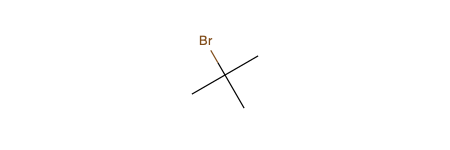

In [5]:
from rdkit.Chem import RemoveHs

RemoveHs(_2_bromo_2_methylpropane)

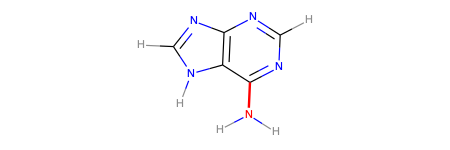

In [6]:
#Highlight a substructure
m.GetSubstructMatch(Chem.MolFromSmiles('C(N)'))
m

In [7]:
#Following is needed to render molecule structure views in Jupyter notebook
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import rdChemReactions

IPythonConsole.ipython_useSVG=True  

rdChemReactions.ReactionFromSmarts("C=CCBr>>C=CCI");

### `openbabel` and `pybel`

[`openbabel`](http://openbabel.org/wiki/Main_Page), an open source chemistry toolbox, provides a wide range of tools for searching for and converting between various chemistry related representations.

A key part of the *openbabel* Python API is the `pybel` package which supports chemical structure parsing, format conversion, and display.

In [ ]:
%%capture

try:
    import openbabel
except:
    %pip install openbabel-wheel
    ##!brew install open-babel

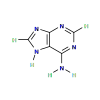

In [8]:
from openbabel import pybel

mol = pybel.readstring( "smi","C1=NC2=C(N1)C(=NC=N2)N" )

#Add hydrogens
mol.addh()

#By default, we preview a small SVG output graphic
mol

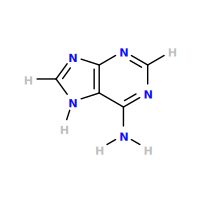

In [9]:
#  Better preview
from IPython.display import SVG

SVG(mol.write("svg"))

In [10]:
mol.write("smi")

'c1nc2c([nH]1)c(ncn2)N\t\n'

In [11]:
from IPython.display import display

def smilesSVG(smi, addH=False, bw=False):
    ''' Render molecule structure from SMILES string as SVG. '''
    
    mol = pybel.readstring( "smi",smi )
    if addH: mol.addh()
    conv = pybel.ob.OBConversion()
    conv.SetOutFormat("svg")
    #Optonally, set black and white output
    #The openbabel SVG export formatter has an -xu option which we can pass
    #Via: https://github.com/openbabel/openbabel/issues/1879#issuecomment-411830813
    if bw:
        conv.SetOptions('u', conv.OUTOPTIONS)
    display(SVG(conv.WriteString(mol.OBMol)))
    #display(SVG(mol.write("svg")))

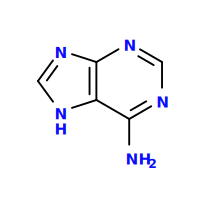

In [12]:
smilesSVG( "C1=NC2=C(N1)C(=NC=N2)N" )

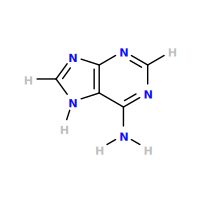

In [13]:
smilesSVG( "C1=NC2=C(N1)C(=NC=N2)N", addH= True )


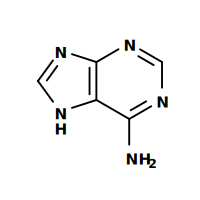

In [14]:
smilesSVG( "C1=NC2=C(N1)C(=NC=N2)N", addH=False, bw=True );


##  3D visualisations — `py3dmol` demo

We can embed interactive 3D widget visualisations of molecules into a page using the `py3dmol` widget:

In [15]:
%%capture
try:
    import py3Dmol
except:
    %pip install py3Dmol

In [16]:
import py3Dmol

# Lookup a molecule using its CID (PubChem Compound Identification) code
p=py3Dmol.view(query='cid:702')

# Set the render style
p.setStyle({'stick': {'radius': .1}, 'sphere': {'scale': 0.25}})
p.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

*Various lookup codes: https://pubchem.ncbi.nlm.nih.gov/search/help_search.html*

SMILES/SMARTS Input
SMILES -- Simplified Molecular Input Line Entry System,

Protein Data Bank (PDB) 

In [17]:
p = py3Dmol.view(query='pdb:1ycr')
p.setStyle({'stick': {'radius': .1}, 'sphere': {'scale': 0.25}})

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [18]:
p.setStyle({'cartoon':{'color':'spectrum'}});

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

## `nglview`



In [19]:
%%capture
try:
    import nglview
except:
    %pip install nglview
    !jupyter-nbextension enable nglview --py --sys-prefix

In [20]:
import nglview as nv

view = nv.show_structure_file(nv.datafiles.PDB)
view

NGLWidget()

In [21]:
# Useful to pop out in Jupyter notebook context?
view.clear_representations()
view.add_licorice('not hydrogen', color='blue')

In [22]:
view.clear_representations()
view.add_cartoon()
view.add_surface(opacity=0.3)

# Force render here but the original is also updated?
view.render_image()

Image(value=b'', width='99%')

In [27]:
view.download_image("test.png")

# Downloads to download dir
# To specify a download path requires a workaround of working in a separate thread:
# https://github.com/nglviewer/nglview/blob/master/docs/FAQ.md#how-to-make-nglview-view-object-write-png-file
#from IPython.display import Image
#Image(PATH_TO_IMAGE)